# Zadanie 1. Segmentacja obrazu za pomocą algorytmu k-średnich.

Proszę o wczytanie zdjęcia (palm_tree.jpg, źródło: https://www.pexels.com/photo/silhouette-
of-palm-trees-near-shoreline-461940/) i wykonanie następujących działań:

In [209]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [210]:
image_path = "palm_tree.jpg"
image = Image.open(image_path)

1.1. Wyświetlenie kodów RGB dla każdego piksela.

In [211]:
rgb_array = np.array(image)
rgb_array

array([[[ 28,  35,  63],
        [ 35,  50,  83],
        [ 98, 118, 153],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[ 25,  29,  56],
        [ 36,  47,  79],
        [ 98, 117, 150],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  4,   4,   4]],

       [[ 25,  23,  47],
        [ 36,  43,  72],
        [ 98, 113, 146],
        ...,
        [  3,   3,   3],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 46,  32,  31],
        [ 44,  30,  29],
        [ 49,  34,  31],
        ...,
        [ 35,  25,  23],
        [ 36,  26,  24],
        [ 36,  26,  24]],

       [[ 36,  20,  20],
        [ 47,  31,  31],
        [ 59,  41,  39],
        ...,
        [ 42,  32,  30],
        [ 39,  29,  27],
        [ 37,  27,  25]],

       [[ 41,  27,  26],
        [ 49,  33,  33],
        [ 58,  40,  38],
        ...,
        [ 59,  43,  43],
        [ 51,  37,  36],
        [ 46,  32,  31]]

1.2. Wyświetlenie oryginalnego zdjęcia.

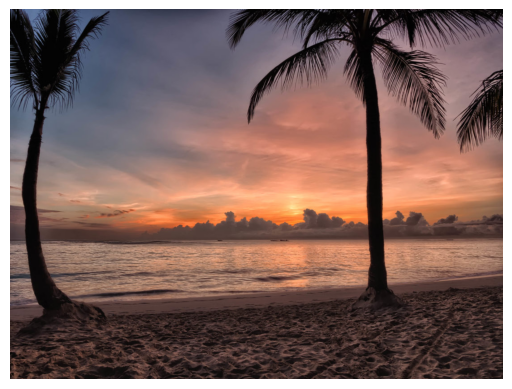

In [212]:
plt.imshow(image)
plt.axis('off')
plt.show()

1.3. Wykonanie kwantyzacji kolorów za pomocą algorytmu k-średnich.

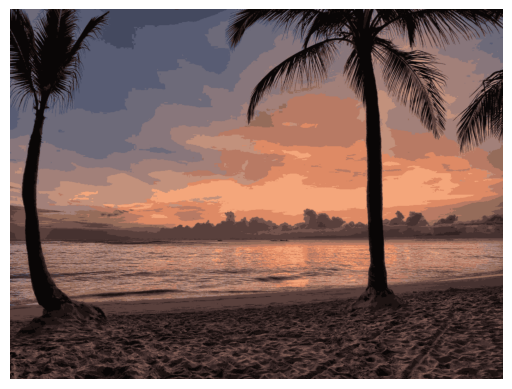

In [213]:
rgb_values = rgb_array.reshape(-1, 3)
kmeans = KMeans(n_clusters=16, random_state=42)
kmeans.fit(rgb_values)
quantized_colors = kmeans.cluster_centers_.astype(int)
quantized_image = quantized_colors[kmeans.labels_].reshape(rgb_array.shape)
plt.imshow(quantized_image)
plt.axis('off')
plt.show()

1.4. Wyświetlenie rozmiarów zdjęcia i liczbę kanałów kolorów (RGB).

In [214]:
width, height = image.size
channels = rgb_array.shape[2]
print("Rozmiar zdjęcia:", width, "x", height)
print("Liczba kanałów kolorów:", channels)

Rozmiar zdjęcia: 1100 x 825
Liczba kanałów kolorów: 3


1.5. Przekształcenie danych z formatu 3D (w, h, c) do 2D (w * h, c).

In [215]:
rgb_2d = rgb_array.reshape(-1, 3)
rgb_2d.shape

(907500, 3)

1.6. Zastosowanie algorytm k-średnich dla 6 klastrów.

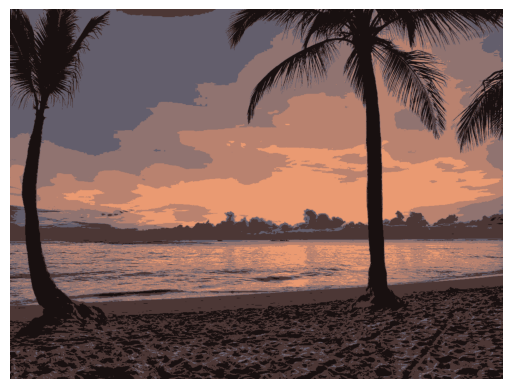

In [216]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(rgb_2d)
quantized_colors_6 = kmeans.cluster_centers_.astype(int)
quantized_image_6 = quantized_colors_6[kmeans.labels_].reshape(rgb_array.shape)
plt.imshow(quantized_image_6)
plt.axis('off')
plt.show()


1.7. Wyświetlenie etykiet klastrów dla każdego piksela.

In [217]:
cluster_labels = kmeans.labels_.reshape(rgb_array.shape[:2])
cluster_labels

array([[4, 1, 2, ..., 4, 4, 4],
       [4, 1, 2, ..., 4, 4, 4],
       [4, 1, 2, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 1, ..., 4, 4, 4],
       [4, 4, 1, ..., 1, 1, 4]], dtype=int32)

1.8. Wyświetlenie współrzędne centroidów.

In [218]:
centroids = kmeans.cluster_centers_
centroids

array([[144.16113952, 115.8572963 , 112.09586089],
       [ 76.52839599,  55.35968422,  53.07647424],
       [ 99.65330218,  94.73421167, 108.62392137],
       [234.204125  , 154.64958728, 114.29867123],
       [ 24.1517086 ,  16.59534821,  16.31434705],
       [185.27100511, 130.96160228, 111.25947998]])

1.9. Zaokrąglenie współrzędnych centroidów (kolory) do 0 miejsc po przecinku.

In [219]:
rounded_centroids = np.round(centroids).astype(int)
rounded_centroids

array([[144, 116, 112],
       [ 77,  55,  53],
       [100,  95, 109],
       [234, 155, 114],
       [ 24,  17,  16],
       [185, 131, 111]])

1.10. Utworzenie skwantyzowanego obrazu, zamieniając każdy piksel na odpowiadający mu
kolor centroidu.

In [220]:
quantized_image_final = rounded_centroids[kmeans.labels_].reshape(rgb_array.shape)

1.11. Wyświetlenie obrazu po kwantyzacji.

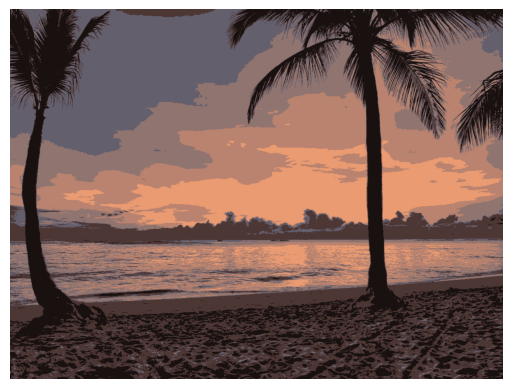

In [221]:
plt.imshow(quantized_image_final)
plt.axis('off')
plt.show()

# Zadanie 2. Korzystając ze zbioru danych iris.csv, proszę o wykonanie następujących czynności:

2.1. Wczytanie danych.

In [222]:
df = pd.read_csv("iris.csv")

2.2. Sprawdzenie kompletności danych.

In [223]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


2.3. Sprawdzenie statystyk podstawowych, informacji nt. danych.

In [224]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


2.4. Wykres punktowy zależności długości płatka w funkcji szerokości płatka. Na jaką ilość
skupień można podzielić zbiór danych?

<ipython-input-226-ab964031a313>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x='petal_length', y='petal_width', palette='Set1')


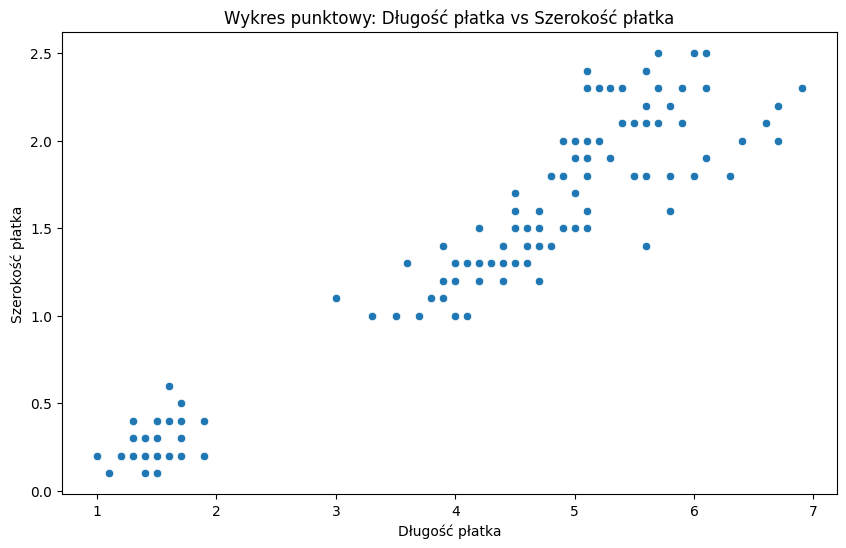

In [226]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Wykres punktowy: Długość płatka vs Szerokość płatka')
plt.show()



```
# Według wykresu należałoby podzielić zbiór danych na dwa skupienia
```



2.5. Wykres punktowy zależności długości płatka w funkcji szerokości płatka, dane
różnicowane za pomocą gatunku/rodzaju.

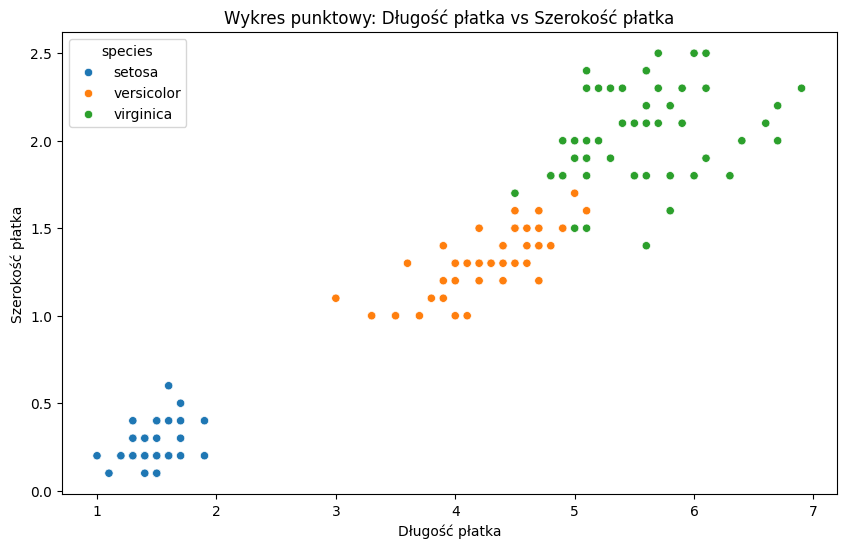

In [227]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Wykres punktowy: Długość płatka vs Szerokość płatka')
plt.show()

2.6. Przygotowanie nowego obiektu df_iris, w której zostanie usunięta kolumna 'species'.

In [228]:
df_iris = df.drop(columns=['species'])

2.7. Przygotowanie nowego obiekt df_iris_std (z punktu 2.6), gdzie dane wejściowe będą
zestandaryzowane.

In [229]:
scaler = StandardScaler()
iris_std = scaler.fit_transform(df_iris)
# iris_std

2.8. Przygotowanie nowego obiekt df_iris_norm (z punktu 2.6), gdzie dane wejściowe będą
znormalizowane w zakresie [0,1].

In [230]:
minmax_scaler = MinMaxScaler()
iris_norm = minmax_scaler.fit_transform(df_iris)
# iris_norm

##2.9. Przygotowanie 3 heatmap. Jakich informacji nt. zbioru danych dotyczących irysów
##dostarczają mapy korelacji:

a. dane wejściowe (punkt 2.6),

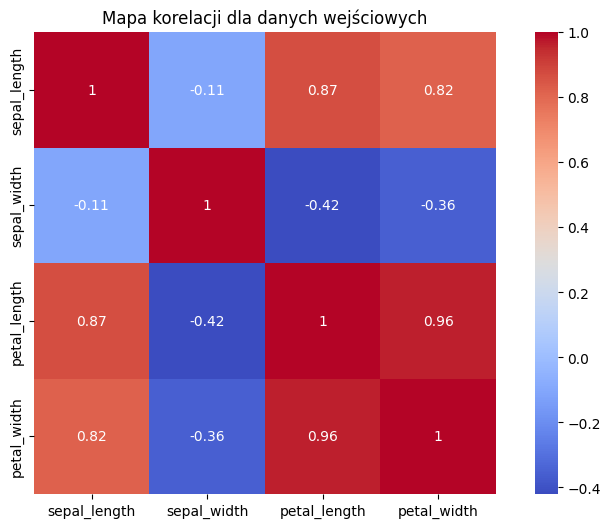

In [231]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_iris.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Mapa korelacji dla danych wejściowych')
plt.show()

b. dane zestandaryzowane (punkt 2.7),

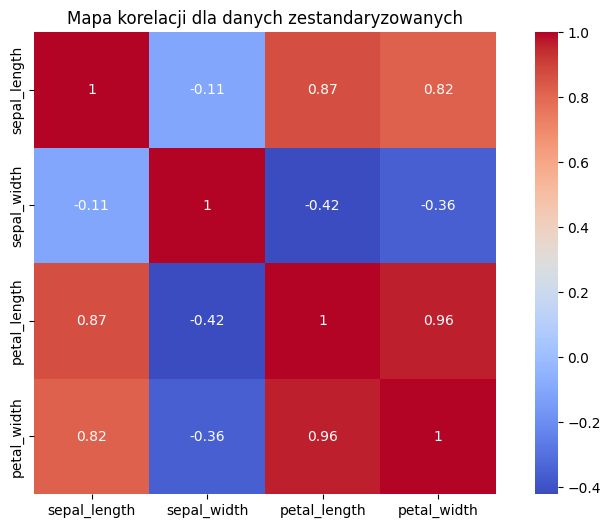

In [232]:
df_iris_std = pd.DataFrame(iris_std, columns=df_iris.columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df_iris_std.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Mapa korelacji dla danych zestandaryzowanych')
plt.show()

c. dane znormalizowane (punkt 2.8).

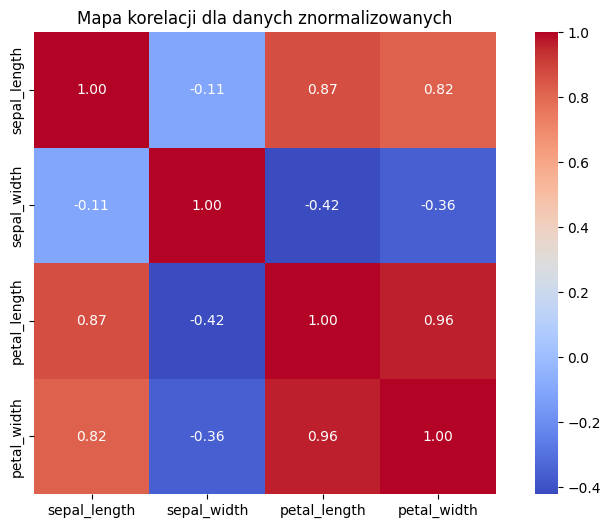

In [233]:
df_iris_norm = pd.DataFrame(iris_norm, columns=df_iris.columns)
plt.figure(figsize=(10, 6))
sns.heatmap(df_iris_norm.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Mapa korelacji dla danych znormalizowanych')
plt.show()

##2.10. Dla danych oryginalnych:

###2.10.1. Zastosować algorytm hierarchiczny metody aglomeracyjnej dla odpowiedniej liczby
grup (patrz: 2.4., 2.5.), dla 3 metod łączenia:

a. Warda,

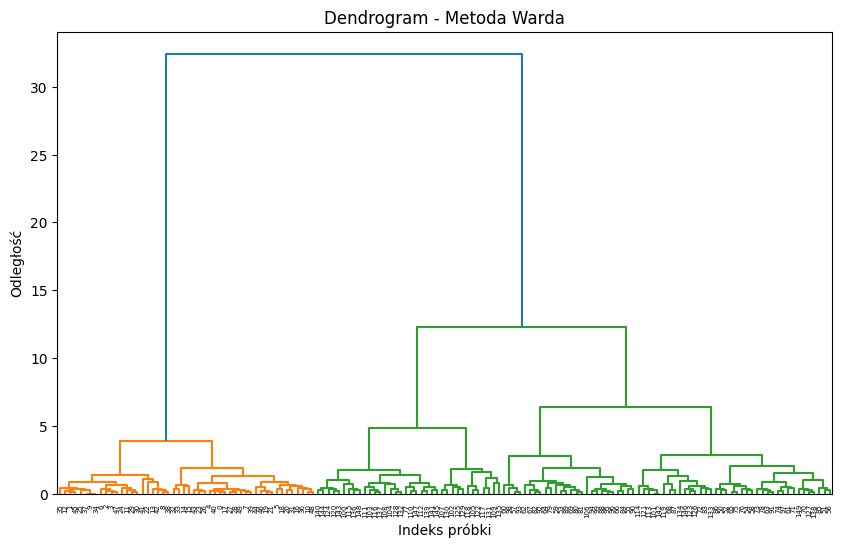

In [234]:
Z_ward = linkage(df_iris, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z_ward)
plt.title('Dendrogram - Metoda Warda')
plt.xlabel('Indeks próbki')
plt.ylabel('Odległość')
plt.show()

b. pojedynczego połączenia,

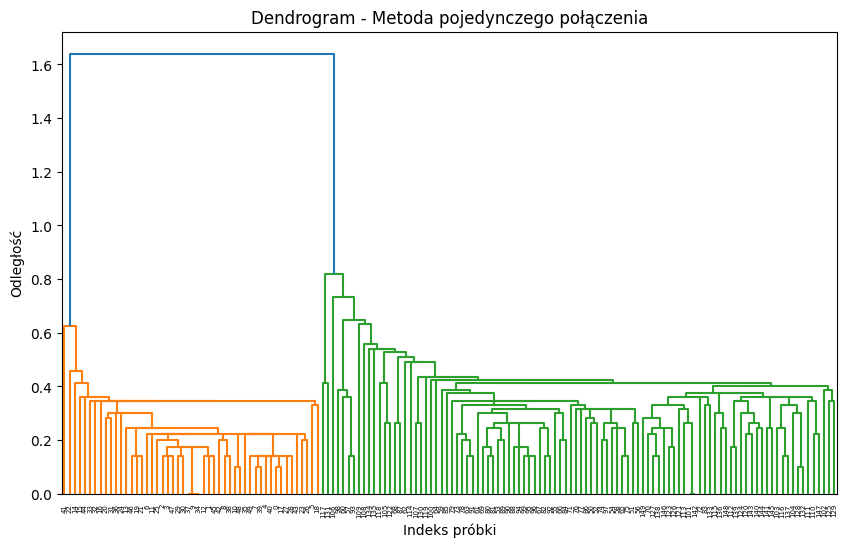

In [235]:
Z_single = linkage(df_iris, method='single')
plt.figure(figsize=(10, 6))
dendrogram(Z_single)
plt.title('Dendrogram - Metoda pojedynczego połączenia')
plt.xlabel('Indeks próbki')
plt.ylabel('Odległość')
plt.show()


c. całkowitego połączenia.

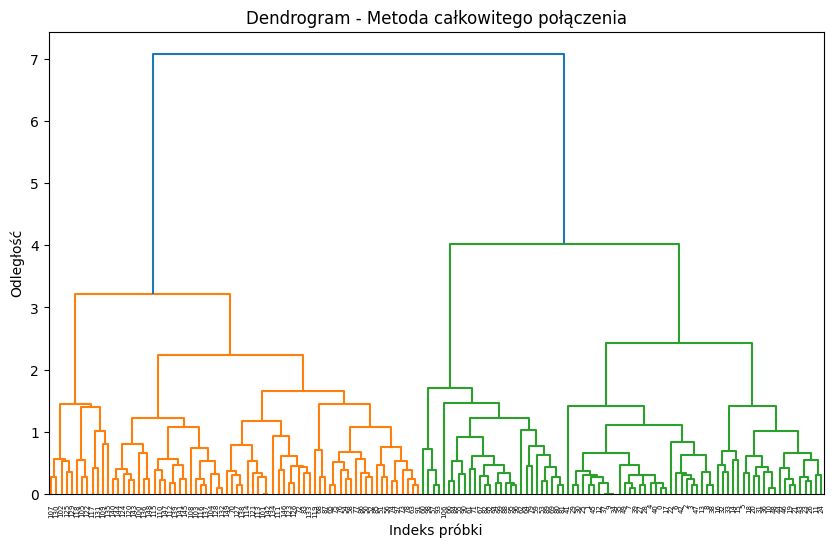

In [236]:
Z_complete = linkage(df_iris, method='complete')
plt.figure(figsize=(10, 6))
dendrogram(Z_complete)
plt.title('Dendrogram - Metoda całkowitego połączenia')
plt.xlabel('Indeks próbki')
plt.ylabel('Odległość')
plt.show()

2.10.2. Zastosowanie algorytmu k-średnich dla odpowiedniej liczby grup (patrz: 2.4., 2.5.).

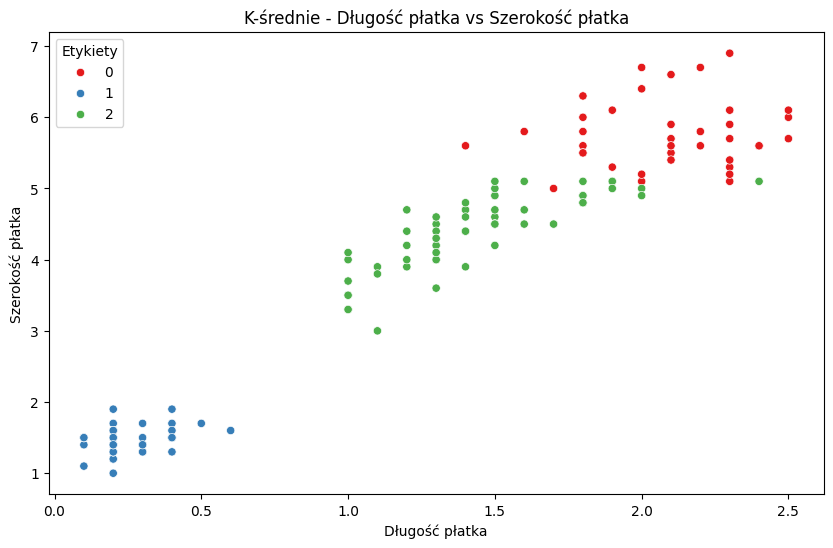

In [237]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_iris)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris, x='petal_width', y='petal_length', hue=kmeans.labels_, palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('K-średnie - Długość płatka vs Szerokość płatka')
plt.legend(title='Etykiety')
plt.show()

In [238]:
df_summary = pd.DataFrame()

2.10.3. Jaki jest wynik profilu dla poszczególnych rozwiązań uzyskanych metodą
aglomeracyjną, a jaki jest wynik profilu dla rozwiązań metodą k-średnich?

2.10.4. Wykres punktowy zależności długości płatka w funkcji szerokości płatka:

dane różnicowane za pomocą etykiet nadanych za pomocą algorytmu hierarchicznego
dla każdej metody łączenia.

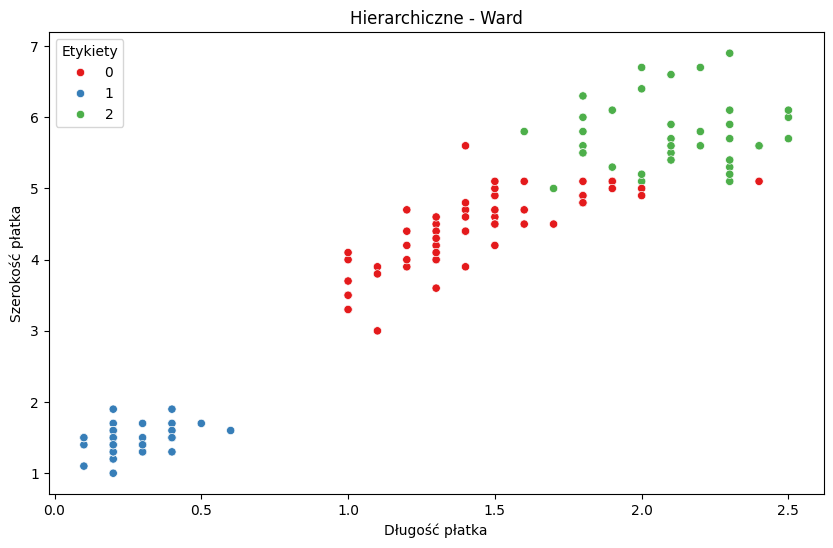

In [239]:
ward_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward = ward_cluster.fit_predict(df_iris)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris, x='petal_width', y='petal_length', hue=labels_ward, palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Hierarchiczne - Ward')
plt.legend(title='Etykiety')
plt.show()

In [240]:
df_summary['Ward original data'] = pd.Series(labels_ward).value_counts()

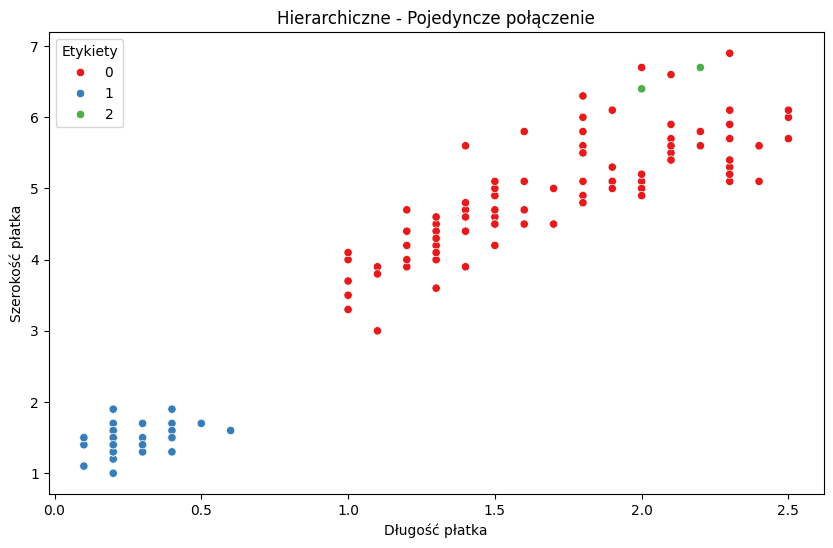

In [241]:
single_cluster = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single = single_cluster.fit_predict(df_iris)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris, x='petal_width', y='petal_length', hue=labels_single, palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Hierarchiczne - Pojedyncze połączenie')
plt.legend(title='Etykiety')
plt.show()

In [242]:
df_summary['Single original data'] = pd.Series(labels_single).value_counts()

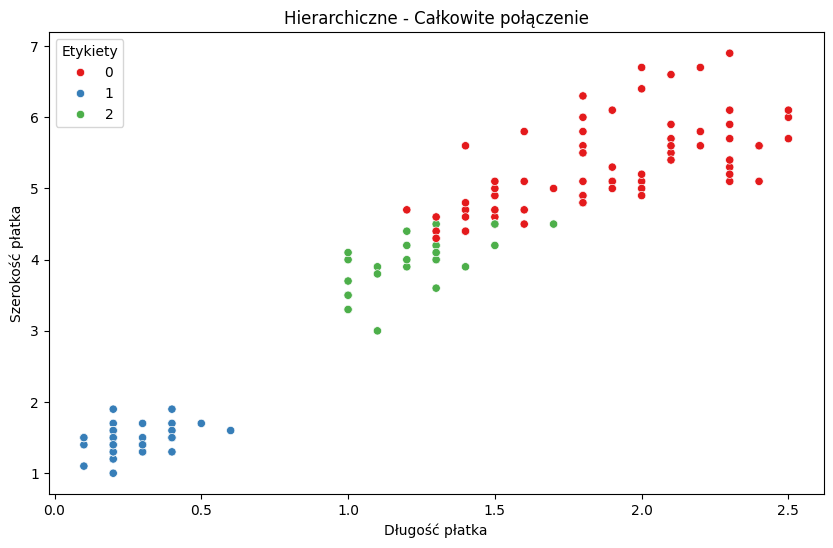

In [243]:
complete_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete = complete_cluster.fit_predict(df_iris)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris, x='petal_width', y='petal_length', hue=labels_complete, palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('Hierarchiczne - Całkowite połączenie')
plt.legend(title='Etykiety')
plt.show()

In [244]:
df_summary['Complete original data'] = pd.Series(labels_complete).value_counts()

dane różnicowane za pomocą etykiet nadanych za pomocą algorytmu k-średnich.

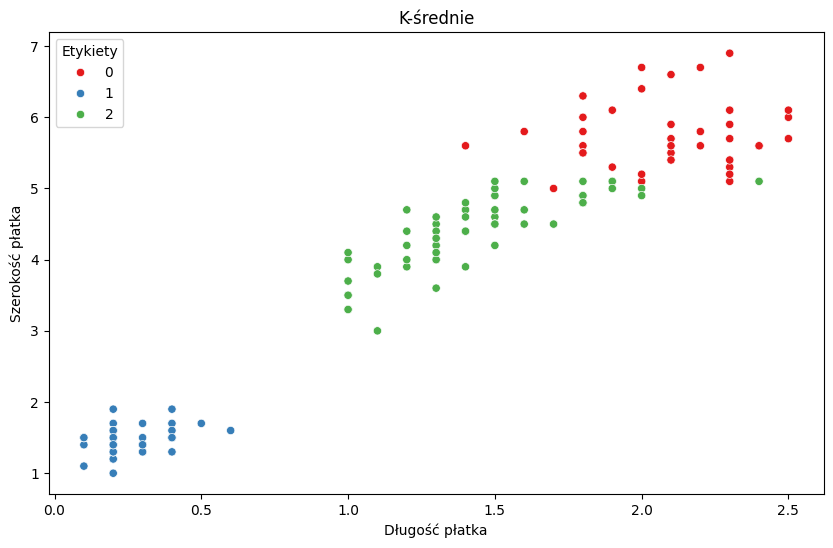

In [245]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_iris)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris, x='petal_width', y='petal_length', hue=kmeans.labels_, palette='Set1')
plt.xlabel('Długość płatka')
plt.ylabel('Szerokość płatka')
plt.title('K-średnie')
plt.legend(title='Etykiety')
plt.show()

In [246]:
df_summary['KMeans original data'] = pd.Series(kmeans.labels_).value_counts()

2.10.5. Czy uzyskane skupienia metodą hierarchiczną i k-średnich są podobne do danych z 2.5.?

In [247]:
df_summary

,Ward original data,Single original data,Complete original data,KMeans original data
0,64,98,72,39
1,50,50,50,50
2,36,2,28,61


##2.11. Dla danych zestandaryzowanych przeprowadzić klasteryzację jak w 2.10.1-2.10.5.

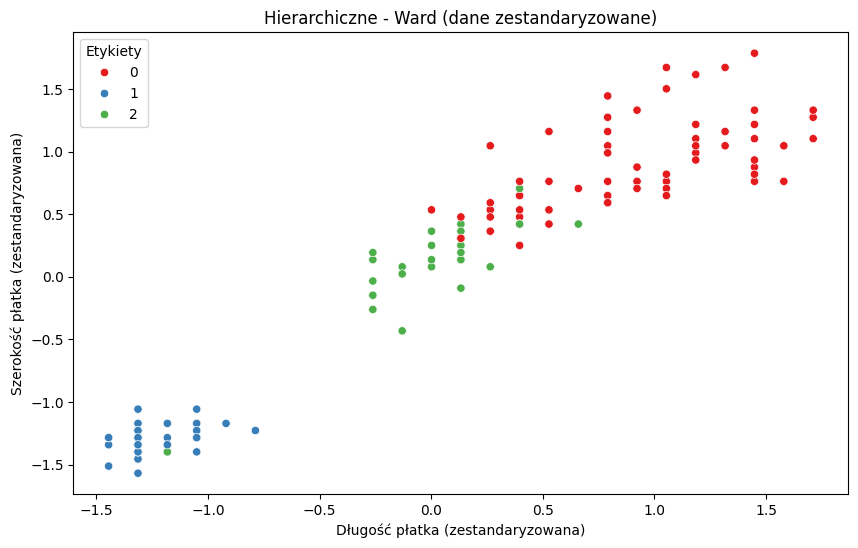

In [248]:
ward_cluster_std = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward_std = ward_cluster_std.fit_predict(df_iris_std)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris_std, x='petal_width', y='petal_length', hue=labels_ward_std, palette='Set1')
plt.xlabel('Długość płatka (zestandaryzowana)')
plt.ylabel('Szerokość płatka (zestandaryzowana)')
plt.title('Hierarchiczne - Ward (dane zestandaryzowane)')
plt.legend(title='Etykiety')
plt.show()


In [249]:
df_summary['Ward std data'] = pd.Series(labels_ward_std).value_counts()

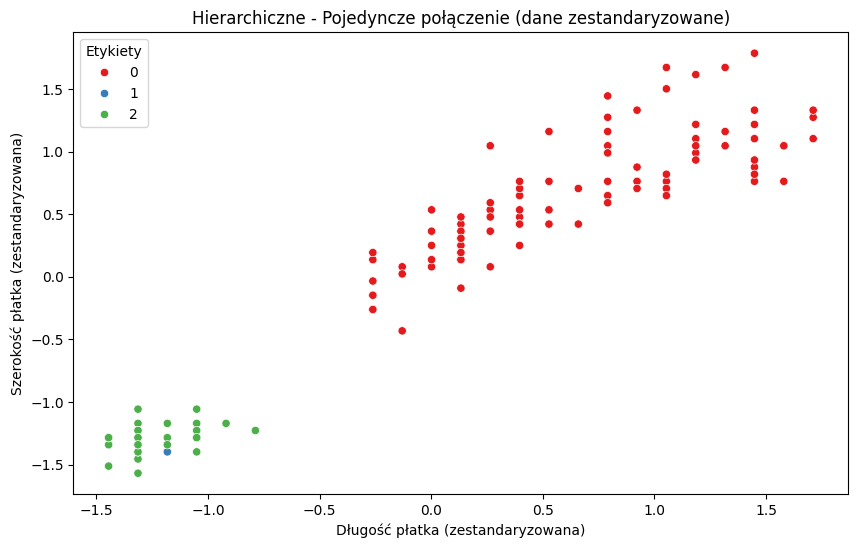

In [250]:
single_cluster_std = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single_std = single_cluster_std.fit_predict(df_iris_std)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris_std, x='petal_width', y='petal_length', hue=labels_single_std, palette='Set1')
plt.xlabel('Długość płatka (zestandaryzowana)')
plt.ylabel('Szerokość płatka (zestandaryzowana)')
plt.title('Hierarchiczne - Pojedyncze połączenie (dane zestandaryzowane)')
plt.legend(title='Etykiety')
plt.show()


In [251]:
df_summary['Single std data'] = pd.Series(labels_single_std).value_counts()

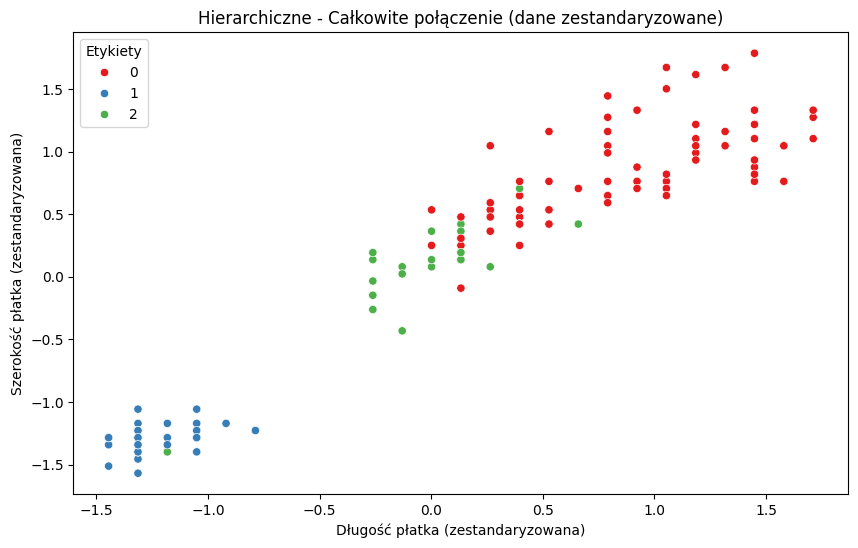

In [252]:
complete_cluster_std = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete_std = complete_cluster_std.fit_predict(df_iris_std)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris_std, x='petal_width', y='petal_length', hue=labels_complete_std, palette='Set1')
plt.xlabel('Długość płatka (zestandaryzowana)')
plt.ylabel('Szerokość płatka (zestandaryzowana)')
plt.title('Hierarchiczne - Całkowite połączenie (dane zestandaryzowane)')
plt.legend(title='Etykiety')
plt.show()


In [253]:
df_summary['Complete std data'] = pd.Series(labels_complete_std).value_counts()

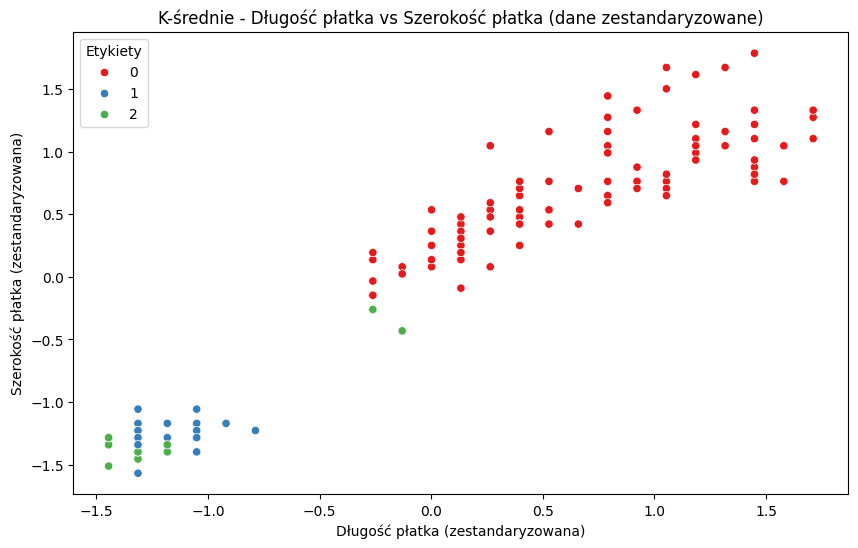

In [254]:
kmeans_std = KMeans(n_clusters=3, random_state=42)
kmeans_std.fit(df_iris_std)
labels_kmeans_std = kmeans_std.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris_std, x='petal_width', y='petal_length', hue=labels_kmeans_std, palette='Set1')
plt.xlabel('Długość płatka (zestandaryzowana)')
plt.ylabel('Szerokość płatka (zestandaryzowana)')
plt.title('K-średnie - Długość płatka vs Szerokość płatka (dane zestandaryzowane)')
plt.legend(title='Etykiety')
plt.show()


In [255]:
df_summary['KMeans std data'] = pd.Series(labels_kmeans_std).value_counts()

##2.12. Dla danych znormalizowanych przeprowadzić klasteryzację jak w 2.10.1-2.10.5.

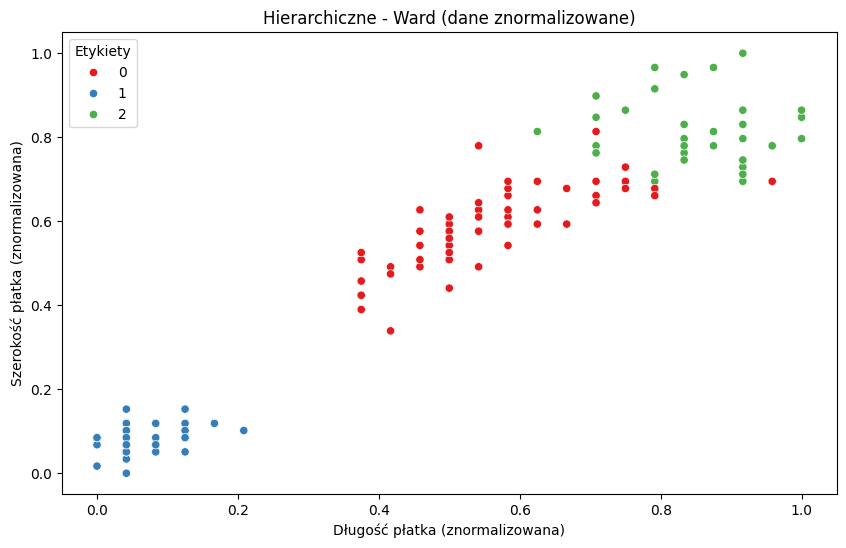

In [256]:
ward_cluster_norm = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_ward_norm = ward_cluster_norm.fit_predict(df_iris_norm)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris_norm, x='petal_width', y='petal_length', hue=labels_ward_norm, palette='Set1')
plt.xlabel('Długość płatka (znormalizowana)')
plt.ylabel('Szerokość płatka (znormalizowana)')
plt.title('Hierarchiczne - Ward (dane znormalizowane)')
plt.legend(title='Etykiety')
plt.show()


In [257]:
df_summary['Ward norm data'] = pd.Series(labels_ward_norm).value_counts()

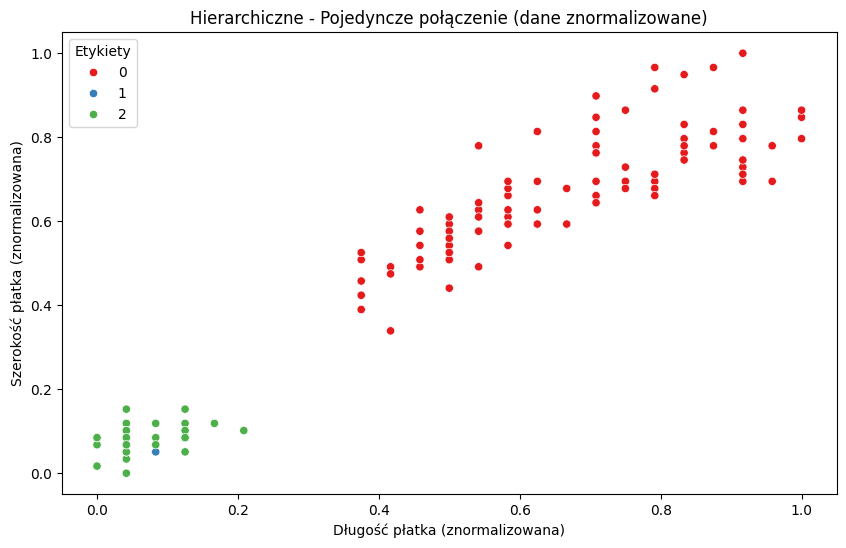

In [258]:
single_cluster_norm = AgglomerativeClustering(n_clusters=3, linkage='single')
labels_single_norm = single_cluster_norm.fit_predict(df_iris_norm)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris_norm, x='petal_width', y='petal_length', hue=labels_single_norm, palette='Set1')
plt.xlabel('Długość płatka (znormalizowana)')
plt.ylabel('Szerokość płatka (znormalizowana)')
plt.title('Hierarchiczne - Pojedyncze połączenie (dane znormalizowane)')
plt.legend(title='Etykiety')
plt.show()


In [259]:
df_summary['Single norm data'] = pd.Series(labels_single_norm).value_counts()

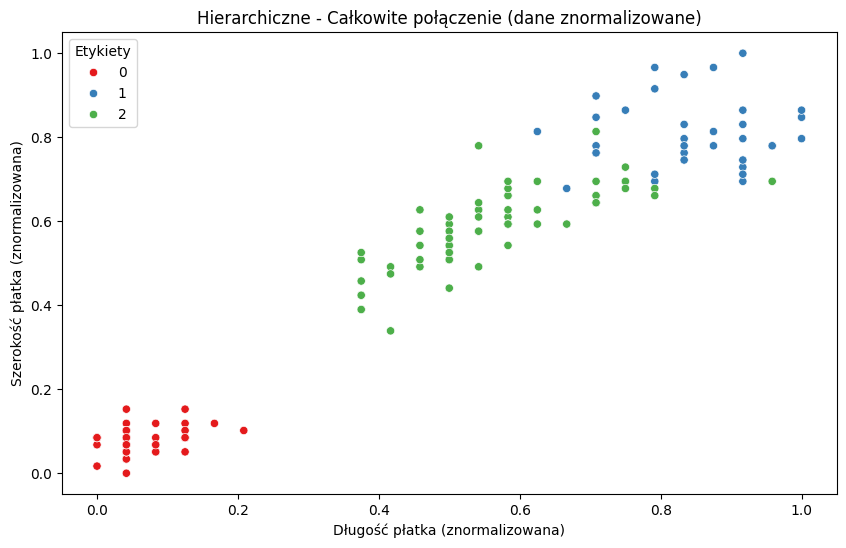

In [260]:
complete_cluster_norm = AgglomerativeClustering(n_clusters=3, linkage='complete')
labels_complete_norm = complete_cluster_norm.fit_predict(df_iris_norm)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris_norm, x='petal_width', y='petal_length', hue=labels_complete_norm, palette='Set1')
plt.xlabel('Długość płatka (znormalizowana)')
plt.ylabel('Szerokość płatka (znormalizowana)')
plt.title('Hierarchiczne - Całkowite połączenie (dane znormalizowane)')
plt.legend(title='Etykiety')
plt.show()


In [261]:
df_summary['Complete norm data'] = pd.Series(labels_complete_norm).value_counts()

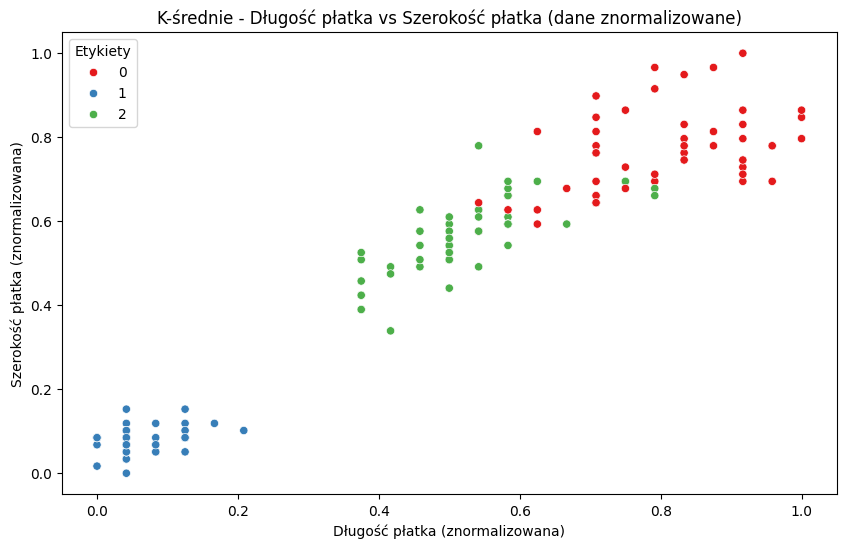

In [262]:
kmeans_norm = KMeans(n_clusters=3, random_state=42)
kmeans_norm.fit(df_iris_norm)
labels_kmeans_norm = kmeans_norm.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iris_norm, x='petal_width', y='petal_length', hue=labels_kmeans_norm, palette='Set1')
plt.xlabel('Długość płatka (znormalizowana)')
plt.ylabel('Szerokość płatka (znormalizowana)')
plt.title('K-średnie - Długość płatka vs Szerokość płatka (dane znormalizowane)')
plt.legend(title='Etykiety')
plt.show()


In [263]:
df_summary['kmeans norm data'] = pd.Series(labels_kmeans_norm).value_counts()
df_summary = (df_summary / 150).round(2)
df_summary


,Ward original data,Single original data,Complete original data,KMeans original data,Ward std data,Single std data,Complete std data,KMeans std data,Ward norm data,Single norm data,Complete norm data,kmeans norm data
0,0.43,0.65,0.48,0.26,0.47,0.67,0.51,0.64,0.45,0.67,0.33,0.35
1,0.33,0.33,0.33,0.33,0.33,0.01,0.33,0.21,0.33,0.01,0.23,0.33
2,0.24,0.01,0.19,0.41,0.20,0.33,0.16,0.15,0.22,0.33,0.44,0.32
